In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats

In [58]:
df = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', header=4)

In [ ]:
df.head()

## Preparing data set

Preparing a data set to use with linear regression(multivariable), we're using these variables: Population, Murder, robbery, and Property crime. We will use these to predict our target variable, property crime. 

In [60]:
#removing first rape column every entry was NAN
df = df.drop('Rape\n(revised\ndefinition)1', axis=1)

#removing last three rows NAN values
df = df.drop([348,349,350])

#renaming columns
df.columns = ['City', 'Population', 'Violent', 'Murder', 'Rape', 'Robbery', 'Aggravated assault',
              'Property crime', 'Burglary','Larceny theft', 'Motor vehicle theft', 'Arson']

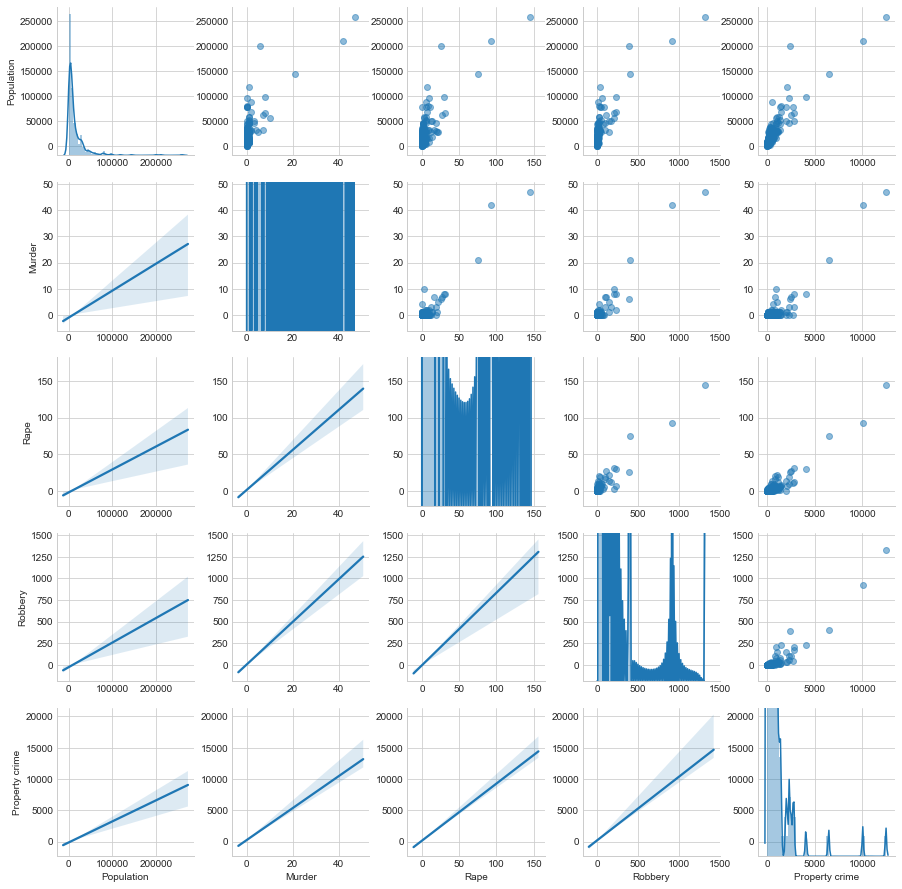

In [61]:
#Reducing dataframe columns to variables of interest
newdf = df[['City', 'Population', 'Murder', 'Rape', 'Robbery', 'Property crime']]

#droping newyork city outlier, to better read graphs.
newdf = newdf.drop(216)

#Plotting scatter plot matrix
g = sns.PairGrid(newdf)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.distplot)
plt.show()

## Feature extraction

Squaring populations, Changing murder and robbery to binary categorical features

In [62]:
#squaring population
df['Pop_squared'] = df['Population'] * df['Population']
#Creating binary categorical feature out of continuous variable columns, murder and robbery.
df['Murder_f'] = np.where((df['Murder'] == 0), 0, 1)
df['robbery_f']  = np.where((df['Robbery'] == 0), 0, 1)

In [63]:
df[['City', 'Property crime', 'Population', 'Pop_squared', 'Murder_f', 'robbery_f']]

,City,Property crime,Population,Pop_squared,Murder_f,robbery_f
0,Adams Village,12.0,1861.0,3.463321e+06,0,0
1,Addison Town and Village,24.0,2577.0,6.640929e+06,0,0
2,Akron Village,16.0,2846.0,8.099716e+06,0,0
3,Albany,4090.0,97956.0,9.595378e+09,1,1
4,Albion Village,223.0,6388.0,4.080654e+07,0,1
5,Alfred Village,46.0,4089.0,1.671992e+07,0,1
6,Allegany Village,10.0,1781.0,3.171961e+06,0,0
7,Amherst Town,2118.0,118296.0,1.399394e+10,1,1
8,Amityville Village,210.0,9519.0,9.061136e+07,0,1
9,Amsterdam,405.0,18182.0,3.305851e+08,0,1
